# MNIST - Classification

<center><img src="https://www.dropbox.com/s/i37mgynkrf1d3vb/supervised_flow_chart.png?raw=1" height=300px width=1000px></img></center>

# 01 : Frame the Problem

We need to build a classifier using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning. 

Whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST. 

Each image is labeled with the digit it represents. Each digit is represented by 28 x 28, each cell representing pixel depth.

# 02 : Obtaining the Data

### Import the Libraries

In [0]:
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Reading the data from CSV File

In [2]:
!wget https://www.dropbox.com/s/lskvhzb0gy8npv9/mnistdata.csv
mnist = pd.read_csv("mnistdata.csv")
mnist.info()

--2018-11-11 17:02:26--  https://www.dropbox.com/s/lskvhzb0gy8npv9/mnistdata.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/lskvhzb0gy8npv9/mnistdata.csv [following]
--2018-11-11 17:02:26--  https://www.dropbox.com/s/raw/lskvhzb0gy8npv9/mnistdata.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca1a6fba4c46fee28316bf18139.dl.dropboxusercontent.com/cd/0/inline/AVVzEeDRX9MmkaySSYmeIclHHUxD3Sq0eAwluaXFmWWaLuOOXMVIZtCno6-sOiPM8qmcq-j1wCLpOjz5r6S5iO8zlzxtQpojpC68s12g__u4oIekXpTmrbomt67rPla-rE9xEnJq9KTtRaRYYhKimSKXPHdl-QyM2JIOJoDX9bmbGdpIwA3anhnZxyVbfTa0VuE/file [following]
--2018-11-11 17:02:26--  https://uca1a6fba4c46fee28316bf18139.dl.dropboxusercontent.com/cd/0/inline/AVVzEeDRX9MmkaySSYmeIclHHUxD3Sq0eAwluaXFmWWaL

In [0]:
y = mnist['Label'] #getting the labels from Data
mnist.drop('Label',axis=1,inplace = True) #After we drop the Labels we have remaining data.
X = mnist

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28*28 

784

# 03 : Analyze Data

Prepare the Features and Target variables.
To analyze what is the shape of the feature set.

Visualizing a random digit using the Matplotlib Library

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


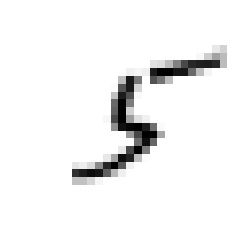

In [7]:
some_digit = X.iloc[35000]
some_digit_image = some_digit.reshape(28, 28) # to get it into a 2D array
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
y[35000]

5

# 04 : Feature Engineering

MNIST data is divided as follows:  
- Train Data - First 60000 rows  
- Test Data - Last 10000 rows  

In [0]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

As all the numbers are in the same place, we shuffle them randomly using numpy permutations function

In [0]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# 05-A : Model Selection





### Binary classifier

Instead of prediciting all the classes, we first predict whether a number is '5' or not.  
We create a target test and train variables such that we have True for digits representing '5' and False for digits representing other than '5'.

In [0]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

In [12]:
y_train_5.head()

15877    False
9974     False
45821    False
53143    False
1070     False
Name: Label, dtype: bool

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# 06-A : Tune the Model

Predicting the digit for random number.

In [14]:
sgd_clf.predict([some_digit])

array([ True])

Cross Value Score will evaluate the model for each fold and gives us an array representing the accuracy obtained in each fold.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9518 , 0.9485 , 0.95685])

Cross Value Predict will predict the target for each fold and append them into a series.

### Cross Validation

In [0]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
y_train_pred.shape

(60000,)

In [18]:
len(y_train_pred)

60000

In [0]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_train_5, y_train_pred)

0.9523833333333334

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53230,  1349],
       [ 1508,  3913]])

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # When we predict it it be 5, how often are we right? 

0.7436335993918662

In [23]:
recall_score(y_train_5, y_train_pred) # When it is 5, how often do we predict it to be 5?

0.7218225419664268

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.732565758682018

# 05-B : Model Selection

### Dummy Classifier

In the train set, only 10% of the rows are labelled to be 5 and remaining are not 5's. So instead of using a model, by using a dummy classifier that give 0 as the prediction for every row, we can obtain 90% accuracy.

In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [0]:
never_5_clf = Never5Classifier()

# 06-B : Tune the Model

In [27]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90805, 0.90925, 0.91165])

In [0]:
predictions = never_5_clf.predict(X_test)

In [29]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [30]:
confusion_matrix(y_test_5,predictions)

array([[9108,    0],
       [ 892,    0]])

In [33]:
accuracy_score(y_test_5,predictions)

0.9108

In [31]:
precision_score(y_test_5,predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [32]:
recall_score(y_test_5,predictions)

0.0

# Precision and Recall Threshold

We study the precision recall relationship using SGD Classifier

<center><img src="https://www.dropbox.com/s/anfhedig7uz35fw/tradeoff.png?raw=1" height=300px width=1000px></img></center>

In [0]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [36]:
len(precisions)

59748

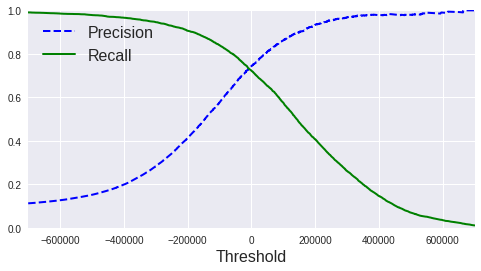

In [37]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

# 05-C : Model Selection

### Multiclass classification

Using SGD Classifier for prediciton of 10 classes ([0-9])

In [38]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5])

# 06-C : Tune the Model

In [0]:
y_hat = sgd_clf.predict(X_test)

In [44]:
confusion_matrix(y_test,y_hat)

array([[ 961,    0,    2,    3,    1,    4,    1,    1,    5,    2],
       [   0, 1102,    2,    3,    0,    1,    2,    1,   23,    1],
       [  11,    7,  877,   30,    6,    2,    6,   15,   73,    5],
       [   5,    1,   14,  934,    0,   15,    1,   16,   19,    5],
       [   3,    2,   14,   16,  854,    0,    1,   16,   19,   57],
       [  16,    9,    8,  101,    8,  641,    5,   12,   68,   24],
       [  13,    3,   30,    2,   12,   27,  820,    4,   47,    0],
       [   1,    7,   13,    1,    4,    0,    1,  963,    8,   30],
       [   7,    7,   11,   59,   24,   20,    1,   28,  798,   19],
       [  10,    7,    6,   29,   31,    1,    0,   89,   10,  826]])

In [39]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-298667.53322538,  -12243.59496783, -143091.35111923,
        -227705.89103997,  -60831.19252792,  101146.95380219,
        -415492.68402937, -237747.79483117,   34482.55574441,
        -354769.51061659]])

In [40]:
np.argmax(some_digit_scores)

5

In [41]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
sgd_clf.classes_[5]

5

# 05-E : Model Selection

### Random Forest Classifier

Using Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5])

# 06-E : Tune the Model

In [0]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [0]:
forest_clf_predictions = forest_clf.predict(X_test)

In [0]:
accuracy_score(y_test,forest_clf_predictions)

0.947

In [0]:
precision_score(y_test,forest_clf_predictions,average="macro")

0.9466437886924716

In [0]:
recall_score(y_test,forest_clf_predictions,average='macro')

0.9461722807797708

# 05-F : Model Selection

### Multilabel classification using K Neighbors Classifier

Multilabel Classification helps to give multiple labelled predictions for single output.  
For example here the labels are:  
- A number is greater than 7 or not.
- Is a number even or not.


In [0]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
y_train_large.shape

(60000,)